In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import requests
# import zipfile as zp


# url = 'https://video.udacity-data.com/topher/2018/October/5bc6498d_fuel-economy-datasets/fuel-economy-datasets.zip'

# response = requests.get(url)

# with open(url.split('/')[-1], 'wb') as file:
#     file.write(response.content)
    
# zip_file = zp.ZipFile('fuel-economy-datasets.zip')
# zip_file.extractall()
# zip_file.close()

In [3]:
# load 2008 datasets
df_08 = pd.read_csv('fuel_economy_datasets/all_alpha_08.csv')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


#### Assess

In [4]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [5]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [6]:
df_08[~(df_08['Drive'].isnull()) & df_08['Cyl'].isnull()].isnull().sum()

Model                     0
Displ                     0
Cyl                     106
Trans                   106
Drive                     0
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            106
City MPG                106
Hwy MPG                 106
Cmb MPG                 106
Unadj Cmb MPG           106
Greenhouse Gas Score    106
SmartWay                  0
dtype: int64

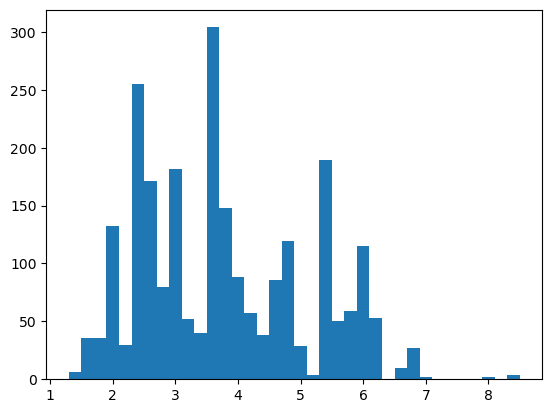

In [7]:
bins = np.arange(1.3, 8.4+0.2, 0.2)
plt.hist(data = df_08, x = 'Displ', bins = bins);

In [8]:
df_08.Cyl.value_counts()

(6 cyl)     864
(4 cyl)     600
(8 cyl)     533
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: Cyl, dtype: int64

In [9]:
df_08.Trans.value_counts()

Auto-L4    502
Auto-L5    329
Auto-S6    327
Man-6      295
Man-5      269
Auto-S5    147
Auto-L6    118
Auto-AV     86
Auto-S4     42
Auto-L7     42
Auto-S7     22
Auto-4      10
Auto-6       8
S8           8
Name: Trans, dtype: int64

In [10]:
df_08.Fuel.value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [11]:
df_08[df_08['Fuel'] == "ethanol/gas"]

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,B4,8GMXT05.3381,SUV,7/7,Drv,11/14,15/20,12/16,12.2796,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B4,8GMXT05.3381,SUV,7/7,Drv,11/14,14/19,12/16,12.0394,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,B5,8GMXT05.3373,SUV,6/6,Drv,11/14,15/20,12/16,12.2796,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B5,8GMXT05.3373,SUV,6/6,Drv,11/14,14/19,12/16,12.0394,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B5,8GMXT05.3373,van,6/6,Drv,9/12,12/16,10/14,10.2922,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,B8,8CRXT04.7PJP,pickup,3/3,Drv,9/14,12/19,10/15,12.9000,4/3,no
1764,NISSAN Armada,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,B5,8NSXT05.6G9B,SUV,6/6,Drv,9/12,13/18,10/14,13.2223,4/2,no
1765,NISSAN Armada,5.6,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,B5,8NSXT05.6G9B,SUV,6/6,Drv,9/12,13/17,10/14,12.8322,4/2,no
1808,NISSAN Titan,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,B5,8NSXT05.6G9B,pickup,6/6,Drv,9/12,13/17,10/14,13.2443,4/2,no


In [12]:
df_08['Sales Area'].value_counts()

FA    1157
CA    1084
FC     163
Name: Sales Area, dtype: int64

#### Observation
* cyl, Air pollution score, Hwy MPG, City MPG, Greenhouse Gas Score and cmb MPG are in object
* space between variable names (Sales Area, Air Pollution Score, etc)
* Sales Area  and Veh Class in object datatype
* 93 of the 199 vehicles with null entries have no drive specified.  
* Displ is multimodal with few vehicle with displ more than 7.5
* Cyl entries have cyl suffix
* vehicles with trans S8 aren't specified if manual or automatic 
* two entries stacked in a row for fuel type ethanol/gas

### Cleaning

In [49]:
df_08_copy = df_08.copy()

#### Define
* Drop all the columns with null value for vehicle test result

#### code

In [50]:
df_08.dropna(inplace = True)

#### Test

In [51]:
df_08.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales Area              0
Stnd                    0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
FE Calc Appr            0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Unadj Cmb MPG           0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

#### Define
* extract just the number, use it as values for Cyl column and then convert it to int

#### Code

In [52]:
df_08['Cyl'] = df_08['Cyl'].str.extract(r"(\d+)").astype(int)

#### Test

In [53]:
df_08["Cyl"].value_counts()

6     864
4     600
8     533
5     113
12     60
10     29
2       4
16      2
Name: Cyl, dtype: int64

#### Define
* convert the columns name to lowercase and then replace the space with underscore

#### Code

In [74]:
def rename_col(col):
    if len(col.split(" ")) == 1:
        return col.lower()
    else:
        return col.lower().replace(" ", "_")
    
    
# rename the columns
df_08.columns = df_08.columns.to_series().apply(rename_col)

#### Test

In [76]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'sales_area', 'stnd',
       'underhood_id', 'veh_class', 'air_pollution_score', 'fe_calc_appr',
       'city_mpg', 'hwy_mpg', 'cmb_mpg', 'unadj_cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

#### Define
* extract all the entries for ethanol/gas fuel. split the values of the affected columns over "/", explode the entries into individual rows, and use it to replace the extracted entries in the intial dataframe
* change the datatype of Air pollution score, Hwy MPG, City MPG, Greenhouse Gas Score and cmb MPG to int
* drop columns that aren't relevant to the analysis: "stnd", "underhood_id", and "unadj_cmb_mpg"

#### Code

In [88]:
# extract entries for ethanol/gas

hb = df_08[df_08.fuel == "ethanol/gas"]

# create a cody of hb

hb_copy = hb.copy()

# split stacked entries over "/" 

affected_col = ["fuel", "air_pollution_score", "city_mpg", "hwy_mpg", "cmb_mpg", "greenhouse_gas_score"]
for col in affected_col:
    hb_copy[col] = hb_copy[col].str.split('/')
    
# explode the stacked records
hb_copy = hb_copy.explode(affected_col, ignore_index = True)

# drop entries with stacked values 
df_08.drop(index = hb.index, inplace = True)

# save the outcome 
df_08_clean = pd.concat([df_08, hb_copy], ignore_index = True)

In [122]:
# change the datatype of  Hwy MPG, City MPG, Greenhouse Gas Score and cmb MPG to int
df_08_clean[["city_mpg", "hwy_mpg", "cmb_mpg", "greenhouse_gas_score"]] = df_08_clean[["city_mpg", "hwy_mpg", "cmb_mpg", "greenhouse_gas_score"]].astype(int)

# change the datatype of Air pollution score to float
df_08_clean["air_pollution_score"] = df_08_clean["air_pollution_score"].astype(float)

# drop columns that aren't relevant to the analysis
df_08_clean.drop(columns = ["stnd", "underhood_id", "fe_calc_appr", "unadj_cmb_mpg"], inplace = True)

#### Test

In [128]:
df_08_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2271 non-null   object 
 1   displ                 2271 non-null   float64
 2   cyl                   2271 non-null   int32  
 3   trans                 2271 non-null   object 
 4   drive                 2271 non-null   object 
 5   fuel                  2271 non-null   object 
 6   sales_area            2271 non-null   object 
 7   veh_class             2271 non-null   object 
 8   air_pollution_score   2271 non-null   float64
 9   city_mpg              2271 non-null   int32  
 10  hwy_mpg               2271 non-null   int32  
 11  cmb_mpg               2271 non-null   int32  
 12  greenhouse_gas_score  2271 non-null   int32  
 13  smartway              2271 non-null   object 
dtypes: float64(2), int32(5), object(7)
memory usage: 204.2+ KB


In [133]:
for value in df_08_clean.fuel:
    assert value != "ethanol/gas"

#### Define
* drop vehicles with trans S8
* convert Sales Area and Veh Class to category datatype

#### Code

In [136]:
# drop vehicles with trans S8

df_08_clean[df_08_clean.trans == "S8"]

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1164,LEXUS GS 460,4.6,8,S8,2WD,Gasoline,CA,midsize car,7.0,17,24,20,6,yes
1165,LEXUS GS 460,4.6,8,S8,2WD,Gasoline,FA,midsize car,6.0,17,24,20,6,no
1176,LEXUS LS 460,4.6,8,S8,2WD,Gasoline,CA,midsize car,7.0,16,24,19,5,no
1177,LEXUS LS 460,4.6,8,S8,2WD,Gasoline,FA,midsize car,6.0,16,24,19,5,no
1178,LEXUS LS 460 L,4.6,8,S8,2WD,Gasoline,CA,midsize car,7.0,16,24,19,5,no
1179,LEXUS LS 460 L,4.6,8,S8,2WD,Gasoline,FA,midsize car,6.0,16,24,19,5,no
1180,LEXUS LS 600HL,5.0,8,S8,4WD,Gasoline,CA,midsize car,9.0,20,22,21,6,yes
1181,LEXUS LS 600HL,5.0,8,S8,4WD,Gasoline,FA,midsize car,8.0,20,22,21,6,yes


Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much? \
Q2: How much have vehicle classes improved in fuel economy (increased in mpg)? \
Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas) \
Q4: What features are associated with better fuel economy (mpg)? \
Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [106]:
original_08 = df_08.copy()
original_18 = df_18.copy()

## Assess 2008 Datasets

In [107]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [108]:
# check the dataset information 

df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

### Observation
* 18 features recorded for 2404 entries
* 199 entries have no record for Cyl, Trans, City MPG, Hwy MPG, Cmb MPG, Greenhouse Gas Score, FE Calc Appr
* All the 93 entries with null value for DRive are among the 199 with null value for Cyl
* Cyl is Object
* Air pollution score, City MPG, Hwy MPG, Cmb MPG and Greenhouse Gas Score are object datatype
* Column names are in sentence case

In [109]:
# Check duplicated rows

print(len(df_08[df_08.duplicated()]))
df_08[df_08.duplicated()]

25


,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
752,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
754,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,CA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
769,FORD E150,4.6,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
771,FORD E150,4.6,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
773,FORD E150,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
775,FORD E150,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
794,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
797,FORD E350,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
800,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,HDV,8FMXK05.46R3,van,2,NaN,NaN,NaN,NaN,NaN,NaN,no
958,FREIGHTLINER 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no


### Observation
* 25 duplicated entries 

In [110]:
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

### Observation
* Drive, Fuel, Sales Area, Fe Calc Appr, and SmartWay have unique values less than or equal to 5

In [111]:
df_08[df_08.Fuel == 'ethanol/gas']

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,B4,8GMXT05.3381,SUV,7/7,Drv,11/14,15/20,12/16,12.2796,6/4,no
317,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B4,8GMXT05.3381,SUV,7/7,Drv,11/14,14/19,12/16,12.0394,6/4,no
321,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,2WD,ethanol/gas,FC,B5,8GMXT05.3373,SUV,6/6,Drv,11/14,15/20,12/16,12.2796,6/4,no
322,CHEVROLET Avalanche 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B5,8GMXT05.3373,SUV,6/6,Drv,11/14,14/19,12/16,12.0394,6/4,no
380,CHEVROLET Express 1500,5.3,(8 cyl),Auto-L4,4WD,ethanol/gas,FC,B5,8GMXT05.3373,van,6/6,Drv,9/12,12/16,10/14,10.2922,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,B8,8CRXT04.7PJP,pickup,3/3,Drv,9/14,12/19,10/15,12.9000,4/3,no
1764,NISSAN Armada,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,B5,8NSXT05.6G9B,SUV,6/6,Drv,9/12,13/18,10/14,13.2223,4/2,no
1765,NISSAN Armada,5.6,(8 cyl),Auto-L5,4WD,ethanol/gas,FA,B5,8NSXT05.6G9B,SUV,6/6,Drv,9/12,13/17,10/14,12.8322,4/2,no
1808,NISSAN Titan,5.6,(8 cyl),Auto-L5,2WD,ethanol/gas,FA,B5,8NSXT05.6G9B,pickup,6/6,Drv,9/12,13/17,10/14,13.2443,4/2,no


### Observation
* Ethanol/gas fuel type has two records stacked in one row

## Assess 2018 datasets

In [112]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [113]:
# check the dataset information 

df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [114]:
df_18[df_18.Displ.isnull()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
996,KIA Soul Electric,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,JKMXV00.0411,station wagon,10,124,93,108,10,Elite,0
997,KIA Soul Electric,NaN,NaN,Auto-1,2WD,Electricity,CA,ZEV,California ZEV,JKMXV00.0411,station wagon,10,124,93,108,10,Elite,0


### Observation
* 18 features recorded for 1611 entries
* 2 entries have null values for Displ and Cyl
* Cyl is float
* City MPG, Hwy MPG, Cmb MPG and Comb CO2 are object datatype
* Column names are in sentence case

In [115]:
# Check duplicated rows
df_18.duplicated().sum()

0

### Observation 
* No duplicated row

In [116]:
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

### Observation 
* Drive, Fuel, Cert Region, and SmartWay have values that are less than or equal to 5

In [117]:
df_18.Fuel.value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

### Observation
* Ethanol/gas and gasoline/electricity fuel types have two records stacked in one row

In [118]:
# common columns to the two datasets 

common_col = set(df_08.columns).intersection(df_18.columns)
common_col

{'Air Pollution Score',
 'City MPG',
 'Cmb MPG',
 'Cyl',
 'Displ',
 'Drive',
 'Fuel',
 'Greenhouse Gas Score',
 'Hwy MPG',
 'Model',
 'SmartWay',
 'Stnd',
 'Trans',
 'Underhood ID',
 'Veh Class'}

### Observation
* Columns 2008 dataset only: \
    FE Calc Appr \
    Unadj Cmb MPG 
* Columns in 2018 dataset only: \
    Stnd Description \
    Comb CO2 
* Sales Area and Cert Region are similar but named differently

## Cleaning

#### Drop null values in both datasets

In [119]:
# drop the null values for 2008 datasets

df_08.dropna(inplace = True)

# drop the null values for 2018 datasets
df_18.dropna(inplace = True)


# test
print(df_08.isnull().sum(), '\n\n')

print(df_18.isnull().sum())

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales Area              0
Stnd                    0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
FE Calc Appr            0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Unadj Cmb MPG           0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64 


Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64


In [120]:
# Drop columns that are not common to the two datasets and those that are not relevant to the analysis

# 2008 datasets
df_08.drop(columns = ["FE Calc Appr", "Unadj Cmb MPG", "Stnd", "Underhood ID"], inplace = True)


# 2018 datasets
df_18.drop(columns = ["Stnd Description", "Comb CO2", "Stnd", "Underhood ID"], inplace = True)

#Test
print(df_08.columns, '\n\n')
print(df_18.columns)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object') 


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')


In [121]:
# Sales Area and Cert Region are similar but named differently

#change Sales Area in 2008 datasets to Cert Region

df_08.rename(columns = {"Sales Area": "Cert Region"}, inplace = True)

# Test
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [122]:
# Rename the columns

df_08.rename(columns = lambda x: x.strip().lower().replace(' ', '_'), inplace = True)
df_18.rename(columns = lambda x: x.strip().lower().replace(' ', '_'), inplace = True)

# Test

print(df_08.columns, '\n\n')
print(df_18.columns, '\n\n')

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object') 


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object') 




In [123]:
# extract integer from Cyl and convert it to int datatype in 2008 and 2018 datasets

# extract the integer
df_08['cyl'] = df_08['cyl'].str.extract(r'(\d)')

# change datatype of Cyl in 2008 dataset 
df_08['cyl'] = df_08['cyl'].astype('int')


# change datatype of Cyl in 2018 dataset 
df_18.cyl = df_18.cyl.astype('int')

# test
print(df_08.dtypes)
print(df_18.dtypes)

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object
model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object


### Split ethanol/gas into two rows

In [124]:
# explode stacked columns



In [137]:
#split_col = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

hb1 = df_08[df_08.fuel == 'ethanol/gas']
# hb1_copy = hb1.copy()
# hb1_copy.replace('/', ',', regex = True, inplace = True)
# hb1_copy.explode(['fuel'])

In [139]:
hb1.replace()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol/gas,FA,pickup,3/3,9/14,12/19,10/15,4/3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol/gas,FA,SUV,6/6,9/12,13/18,10/14,4/2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol/gas,FA,SUV,6/6,9/12,13/17,10/14,4/2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol/gas,FA,pickup,6/6,9/12,13/17,10/14,4/2,no


In [74]:
hb1.replace('/', ',', regex = True)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,"ethanol,gas",FC,SUV,"7,7","11,14","15,20","12,16","6,4",no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,"ethanol,gas",FC,SUV,"7,7","11,14","14,19","12,16","6,4",no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,"ethanol,gas",FC,SUV,"6,6","11,14","15,20","12,16","6,4",no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,"ethanol,gas",FC,SUV,"6,6","11,14","14,19","12,16","6,4",no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,"ethanol,gas",FC,van,"6,6","9,12","12,16","10,14","4,2",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,"ethanol,gas",FA,pickup,"3,3","9,14","12,19","10,15","4,3",no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,"ethanol,gas",FA,SUV,"6,6","9,12","13,18","10,14","4,2",no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,"ethanol,gas",FA,SUV,"6,6","9,12","13,17","10,14","4,2",no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,"ethanol,gas",FA,pickup,"6,6","9,12","13,17","10,14","4,2",no


In [84]:
a = df_08.copy()
a.replace('/', ',', regex = True).fuel.value_counts()

Gasoline       2129
ethanol,gas      66
diesel            7
CNG               2
ethanol           1
Name: fuel, dtype: int64

In [24]:
hb_08 = df_08[df_08['fuel'].str.contains('/')]
df1 = hb_08.copy()

In [25]:
split_col = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for col in split_col:
    df1[col] = df1[col].str.split('/')
    
df1 = df1.explode(['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score'], ignore_index = True)
df1.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
1,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,FC,SUV,7,14,20,16,4,no
2,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
3,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,FC,SUV,7,14,19,16,4,no
4,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no


In [26]:
hb_18 = df_18[df_18['fuel'].str.contains('/')]
df2 = hb_08.copy()
df2.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no


In [27]:
split_col = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for col in split_col:
    df2[col] = df2[col].str.split('/')
df2 = df2.explode(['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score'], ignore_index = True)
df2.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
1,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,FC,SUV,7,14,20,16,4,no
2,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
3,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,FC,SUV,7,14,19,16,4,no
4,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no


In [28]:
# drop index with stacked values 
df_08.drop(index = hb_08.index, axis = 0, inplace = True)

df_18.drop(hb_18.index, inplace = True)

In [29]:
# Append the shorted dataframe to the original df
clean_df_08 = pd.concat([df_08, df1], ignore_index = True)

clean_df_18 = pd.concat([df_18, df2], ignore_index = True)

#test

print(clean_df_08['fuel'].value_counts(), '\n\n')
print(clean_df_18['fuel'].value_counts())

Gasoline    2129
ethanol       67
gas           66
diesel         7
CNG            2
Name: fuel, dtype: int64 


Gasoline    1492
ethanol       66
gas           66
Diesel        38
Name: fuel, dtype: int64


In [30]:
clean_df_08[['city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']] = \
clean_df_08[['city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']].astype('int')

clean_df_08['air_pollution_score'] = clean_df_08['air_pollution_score']. astype('float')



clean_df_18[['city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']] = \
clean_df_18[['city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']].astype('int')

clean_df_18['air_pollution_score'] = clean_df_18['air_pollution_score']. astype('float')

# Test

print(clean_df_08.dtypes, '\n\n\n')
print(clean_df_18.dtypes)

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                  int32
hwy_mpg                   int32
cmb_mpg                   int32
greenhouse_gas_score      int32
smartway                 object
dtype: object 



model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                  int32
hwy_mpg                   int32
cmb_mpg                   int32
greenhouse_gas_score      int32
smartway                 object
dtype: object


In [31]:
# check both 2008 and 2018 have same column name

(clean_df_08.columns == clean_df_18.columns).any()

True

In [32]:
# clean_df_08.rename(columns = {'model' : 'model_2008'}, inplace  = True)
# clean_df_18.rename(columns = {'model': 'model_2018'}, inplace = True)

In [33]:
# # concat the two dataframe

# fuel_econ = pd.concat([clean_df_08, clean_df_18], ignore_index = True)

# # test
# fuel_econ.columns

In [34]:
# fuel_econ.melt(value_vars = ['model_2008', 'model_2018'], var_name='year', value_name='model',
#                id_vars = ['displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
#        'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
#        'greenhouse_gas_score', 'smartway'], 
#                ignore_index  = True)

# # id_vars=None,
# #     value_vars=None,
# #     var_name=None,
# #     value_name='value',
# #     col_level: 'Level | None' = None,
# #     ignore_index: 'bool'

# Univariate Exploration

In [35]:
df_008 = clean_df_08.copy()
df_018 = clean_df_18.copy()

In [37]:
df_008.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15,20,17,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17,22,19,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16,24,19,5,no


<AxesSubplot:>

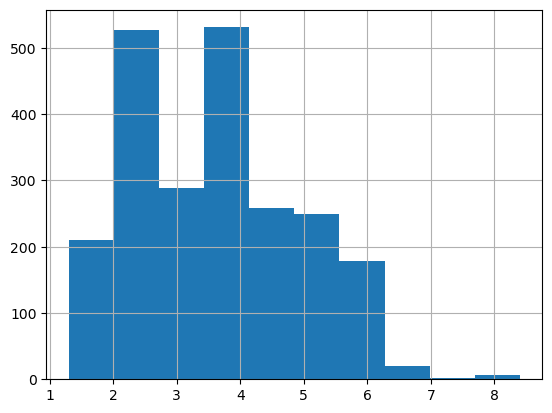

In [44]:
df_008.displ.hist()

<AxesSubplot:>

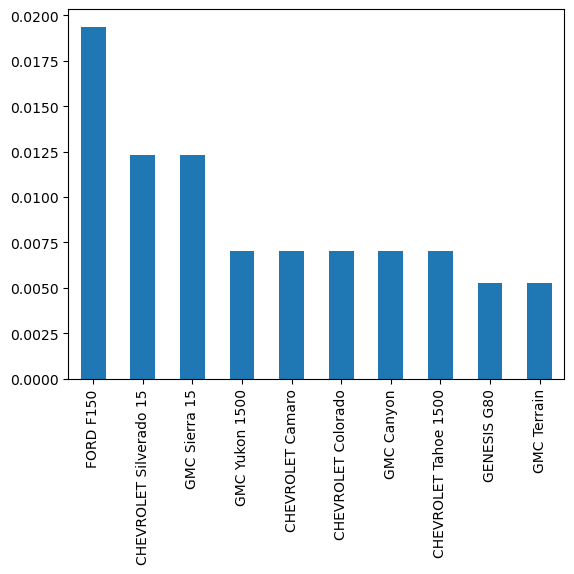

In [50]:
(clean_df_18.model_2018.value_counts()/clean_df_08.shape[0]).nlargest(10).plot(kind = 'bar')

In [51]:
clean_df_08

,model_2008,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15,20,17,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17,22,19,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,FA,SUV,6.0,12,17,14,2,no
2267,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol,FA,pickup,6.0,9,13,10,4,no
2268,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,FA,pickup,6.0,12,17,14,2,no
2269,NISSAN Titan,5.6,8,Auto-L5,4WD,ethanol,FA,pickup,6.0,9,12,10,4,no


## Q1: Are more models using alternative sources of fuel? By how much?

## Q2: How much have vehicle classes improved in fuel economy?

## Q3: What are the characteristics os SmartWay vehicles?

## Q4: What features are associated with better fuel economy?

## Q5: For all the models that were produced in 2008 that are still being produced in 2018, how much has mpg improved and which vehicle improved the most?